In [1]:
using GynC, Plots, Distributions
gr()

cookie: p06qK61PbDeiSJZB
VERSION: 0.5.0


worker_arg: `--worker p06qK61PbDeiSJZB`



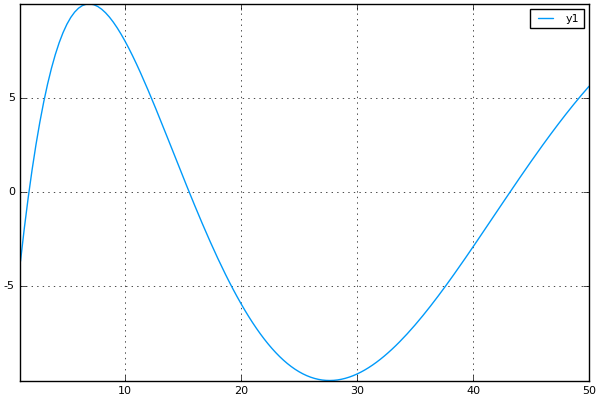

In [2]:
xs = collect(1:1/3:50)
phi(k) = (GynC.Federn.odeohnetreatment(k))[1]
plot(xs, phi.(xs))

In [36]:
measerr = Normal(0,1)
ndata = 300
augz = 100
prior = GynC.Federn.prior

m = GynC.syntheticmodel(xs, phi, prior, ndata, augz, measerr)

augd = 100
@show stdd = KernelDensity.default_bandwidth(m.datas)
ms = GynC.smoothdata(m, augd, stdd);

stdd = KernelDensity.default_bandwidth(m.datas) = 1.5760575231076936


In [67]:
w0 = ones(length(xs)) / length(xs);

#w0 = pdf(Distributions.Beta(3,3), xs/50)
#w0 = w0 / sum(w0)

wprior = pdf(prior, xs)
wprior = wprior / sum(wprior);

In [68]:
niter = 500
h = 0.1

ws = Dict()
@time ws["NPMLE"] = GynC.em(m, w0, niter)
@time ws["DS-MLE"] = GynC.em(ms, w0, niter);
@time ws["MPLE"]  = GynC.mple(m, w0, niter, .98, h)
@time ws["Reference Prior"] = GynC.mple(m, w0, niter, 1, h);

  0.153180 seconds (2.02 k allocations: 1.901 MB)
 27.529483 seconds (2.52 k allocations: 115.159 MB, 0.08% gc time)
 10.873056 seconds (600.91 k allocations: 359.045 MB, 0.78% gc time)
 10.615160 seconds (602.35 k allocations: 184.331 MB, 0.48% gc time)


In [69]:
labels = ["NPMLE" "DS-MLE" "Reference Prior" "MPLE"]
densities = map(l->ws[l][end], labels) |> vec

plot(xs, wprior, label="True Prior", linewidth=2, legendfont=font(10), tickfont=font(8), ylims=(0,0.05), size=(600, 350), grid=false)
plot!(xs, densities, labels=labels, linewidth=1.2)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 20 
 
 
 30 
 
 
 40 
 
 
 50 
 
 
 0.00 
 
 
 0.01 
 
 
 0.02 
 
 
 0.03 
 
 
 0.04 
 
 
 0.05 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:1.4; stroke-opacity:1; fill:none" points="
 43.4296,331.015 47.189,331.015 50.9484,331.015 54.7078,331.015 58.4672,331.015 62.2266,331.015 65.986,331.015 69.7454,331.015 73.5049,331.014 77.2643,331.014 
 81.0237,331.012 84.7831,331.01 88.5425,331.005 92.3019,330.996 96.0613,330.979 99.8207,330.95 103.58,330.899 107.34,330.812 111.099,330.667 114.858,330.432 
 118.618,330.06 122.377,329.485 126.137,328.616 129.896,327.334 133.655,325.491 137.415,322.904 141.174,319.365 144.934,314.645 148.693,308.51 152.452,300.749 
 156.212,291.194 159.971,279.76 163.731,266.475 167.49,251.51 171.25,235.199 175.009,218.048 178.768,200.716 182.528,183.983 186.287,168.699 190.047,155.709 
 193.806,145.78 197.565,139.522 201.325,137.329 205.084,139.336 208.844,145.4 212.603,155.118 216.362,167.872 220.122,182.886 223.881,199.303 227.641,216.266 
 231.4,232.983 235.16,248.781 238.919,263.144 242.678,275.724 246.438,286.335 250.197,294.935 253.957,301.595 257.716,306.467 261.475,309.748 265.235,311.658 
 268.994,312.412 272.754,312.207 276.513,311.216 280.272,309.582 284.032,307.418 287.791,304.814 291.551,301.841 295.31,298.554 299.07,294.998 302.829,291.214 
 306.588,287.238 310.348,283.11 314.107,278.868 317.867,274.555 321.626,270.217 325.385,265.903 329.145,261.662 332.904,257.55 336.664,253.619 340.423,249.924 
 344.182,246.517 347.942,243.449 351.701,240.766 355.461,238.51 359.22,236.716 362.98,235.414 366.739,234.624 370.498,234.359 374.258,234.624 378.017,235.414 
 381.777,236.716 385.536,238.51 389.295,240.766 393.055,243.449 396.814,246.517 400.574,249.924 404.333,253.619 408.092,257.55 411.852,261.663 415.611,265.904 
 419.371,270.22 423.13,274.56 426.889,278.878 430.649,283.129 434.408,287.274 438.168,291.278 441.927,295.114 445.687,298.757 449.446,302.189 453.205,305.396 
 456.965,308.372 460.724,311.111 464.484,313.615 468.243,315.887 472.002,317.934 475.762,319.766 479.521,321.394 483.281,322.832 487.04,324.093 490.799,325.192 
 494.559,326.143 498.318,326.961 502.078,327.66 505.837,328.254 509.597,328.755 513.356,329.175 517.115,329.526 520.875,329.816 524.634,330.055 528.394,330.25 
 532.153,330.409 535.912,330.538 539.672,330.641 543.431,330.724 547.191,330.789 550.95,330.841 554.709,330.882 558.469,330.913 562.228,330.938 565.988,330.957 
 569.747,330.971 573.507,330.982 577.266,330.991 581.025,330.997 584.785,331.002 588.544,331.005 592.304,331.008 596.063,331.01 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e9746a; stroke-width:0.84; stroke-opacity:1; fill:none" points="
 43.4296,304.333 47.189,268.473 50.9484,294.112 54.7078,309.474 58.4672,330.641 62.2266,207.248 65.986,326.52 69.7454,294.578 73.5049,326.378 77.2643,324.186 
 81.0237,295.118 84.7831,323.695 88.5425,331.013 92.3019,331.015 96.0613,331.015 99.8207,331.015 103.58,331.015 107.34,331.015 111.099,331.015 114.858,331.015 
 118.618,331.015 122.377,331.015 126.137,331.015 129.896,331.015 133.655,331.015 137.415,330.757 141.174,318.045 144.934,294.632 148.693,310.251 152.452,325.606 
 156.212,327.89 159.971,321.649 163.731,297.644 167.49,308.451 171.25,325.452 175.009,324.76 178.768,274.824 182.528,173.044 186.287,322.11 190.047,330.864 
 193.806,330.881 197.565,324.61 201.325,187.877 205.084,185.081 208.844,287.236 212.603,305.536 216.362,301.127 220.122,282.78 223.881,254.385 227.641,261.942 
 231.4,294.783 235.16,305.614 238.919,297.382 242.678,287.875 246.438,298.03 250.197,307.367 253.957,302.71 257.716,284.056 261.475,275.945 265.235,299.156 
 268.994,319.417 272.754,326.514 276.513,328.265 280.272,328.124 284.032,326.421 287.791,321.908 291.551,311.722 295.31,291.271 299.07,255.549 302.829,203.872 
 306.588,147.493 310.348,110.984 314.107,115.898 317.867,159.01 321.626,215.

In [70]:
function weightedquantile(ys, w; quantiles=collect(1/8:1/8:7/8))
  sp = sortperm(ys)
  cs = cumsum(w[sp])
  mx = cs[end]
  quantileinds = [findfirst(x->x>=q, cs) for q = mx*quantiles]
  ys[sp[quantileinds]]
end

function calcquantiles(ts, sols, w;quantiles = collect(1/10:1/10:9/10))
  res = Matrix(length(ts), length(quantiles))
  for t in 1:length(ts)
      res[t,:] = weightedquantile([sols[x][t] for x in 1:length(xs)], w, quantiles = quantiles)
  end
  res
end

function plotquantiles(ts, sols, w)
    
  res = calcquantiles(ts, sols, w)
  n = size(res,2)
  p = plot()
  mid = Int((n+1)/2)
  offsets = Int((n-1)/2):-1:0 
  for o in offsets
    plot!(ts, res[:,mid-o], fillrange=res[:,mid+o])
  end
  p
end

function bayesposterior(m, data, wprior)
    L = likelihoodmat(m.ys, data, m.measerr)
    GynC.emiteration(wprior, L)
end

function plottrajdens(ts, sols, w)

  msol = hcat(sols...)
  mkde = hcat([KernelDensity.kde(msol[t,:], boundary = (-13,13), weights=w, bandwidth = 0.5).density for t in 1:size(msol, 1)]...)

  contour(ts, linspace(-13,13, 2048), mkde, clims=(1e-5,0.3), fill=true, seriescolor = :heat, legend=false)
end

plottrajdens (generic function with 1 method)

In [71]:
ts = 0:1/100:2
sols = [GynC.Federn.odesol(k,ts) for k = xs];
plotquantiles(ts, sols, w)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0 
 
 
 0.5 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 -10 
 
 
 -5 
 
 
 0 
 
 
 5 
 
<polygon clip-path="url(#clip02)" points="
34.5407,381.015 37.3483,380.84 40.1559,380.315 42.9635,379.44 45.7711,378.218 48.5787,376.651 51.3864,374.743 54.194,372.495 57.0016,369.913 59.8092,367 
 62.6168,363.763 65.4244,360.209 68.232,356.343 71.0396,352.173 73.8472,347.705 76.6549,342.948 79.4625,337.912 82.2701,332.606 85.0777,327.04 87.8853,321.225 
 90.6929,315.169 93.5005,308.885 96.3081,302.384 99.1157,295.678 101.923,288.782 104.731,281.707 107.539,274.466 110.346,267.073 113.154,259.54 115.961,251.882 
 118.769,244.114 121.577,236.249 124.384,228.304 127.192,220.292 129.999,212.228 132.807,204.126 135.615,196.003 138.422,187.873 141.23,179.752 144.038,171.653 
 146.845,163.593 149.653,155.587 152.46,147.649 155.268,139.794 158.076,132.036 160.883,124.39 163.691,116.87 166.498,109.491 169.306,102.266 172.114,95.2086 
 174.921,88.331 177.729,81.6459 180.536,75.166 183.344,68.9038 186.152,67.0501 188.959,65.4296 191.767,65.9971 194.575,70.6401 197.382,75.1575 200.19,85.7379 
 202.997,95.2798 205.805,104.888 208.613,116.683 211.42,128.841 214.228,141.305 217.035,154.014 219.843,166.907 222.651,179.923 225.458,192.998 228.266,206.07 
 231.073,219.076 233.881,231.954 236.689,244.641 239.496,257.077 242.304,269.202 245.112,280.957 247.919,292.285 250.727,303.133 253.534,313.45 256.342,323.185 
 259.15,332.288 261.957,340.718 264.765,348.438 267.572,355.408 270.38,361.592 273.188,366.96 275.995,371.49 278.803,375.162 281.61,376.845 284.418,378.218 
 287.226,378.406 290.033,379.411 292.841,379.471 295.649,379.479 298.456,379.436 301.264,379.946 304.071,379.967 306.879,379.832 309.687,379.362 312.494,379.305 
 315.302,378.903 318.109,378.379 320.917,378.361 323.725,377.538 326.532,376.646 329.34,375.698 332.148,372.813 334.955,371.377 337.763,368.394 340.57,365.953 
 343.378,364.557 346.186,362.255 348.993,358.03 351.801,357.898 354.608,359.339 357.416,358.177 360.224,361.766 363.031,361.309 365.839,365.273 368.646,366.982 
 371.454,368.275 374.262,371.418 377.069,374.127 379.877,375.765 382.685,375.932 385.492,377.836 388.3,377.372 391.107,378.937 393.915,378.972 396.723,379.271 
 399.53,379.345 402.338,379.895 405.145,379.968 407.953,379.506 410.761,379.583 413.568,379.998 416.376,379.443 419.183,379.452 421.991,379.838 424.799,379.131 
 427.606,379.539 430.414,379.434 433.222,379.104 436.029,377.701 438.837,378.674 441.644,377.199 444.452,375.686 447.26,376.784 450.067,374.849 452.875,373.251 
 455.682,374.508 458.49,372.193 461.298,369.534 464.105,366.537 466.913,363.208 469.72,359.554 472.528,363.076 475.336,359.459 478.143,355.531 480.951,351.302 
 483.759,346.776 486.566,342.291 489.374,347.197 492.181,342.473 494.989,337.477 497.797,343.371 500.604,338.491 503.412,343.021 506.219,344.731 509.027,346.313 
 511.835,347.744 514.642,349.057 517.45,354.639 520.257,357.056 523.065,359.975 525.873,363.837 528.68,364.52 531.488,368.927 534.296,369.907 537.103,370.313 
 539.911,370.649 542.718,372.969 545.526,374.625 548.334,374.77 551.141,374.864 553.949,374.906 556.756,374.898 559.564,374.837 562.372,374.724 565.179,376.774 
 567.987,376.753 570.794,376.774 573.602,376.838 576.41,376.648 579.217,376.302 582.025,375.892 584.833,374.435 587.64,374.747 590.448,374.205 593.255,373.465 
 596.063,372.615 596.063,6.28719 593.255,6.99462 590.448,6.02214 587.64,6.9958 584.833,5.85984 582.025,7.42339 579.217,8.59899 576.41,7.3487 573.602,8.2585 
 570.794,7.38548 567.987,9.40075 565.179,11.8419 562.372,11.2072 559.564,12.1132 556.756,15.0476 553.949,17.2154 551.141,15.5856 548.334,19.0474 545.526,22.9303 
 542.718,27.2269 539.911,31.9256 537.103,37.0133 534.296,33.2284 531.488,38.4687 528.68,44.0886 525.873,45.5061 523.065,46.0534 520.257,52.2191 517.45,50.0342 
 514.642,51.2627 511.835,51.0963 509.027,53.2778 506.219,54.0602 503.412,46.545

In [72]:
function plotcol(w) 
    ts = 0:1/100:2
    sols = [GynC.Federn.odesol(k,ts) for k = xs]
    meas = [2]
    
    
    ylims = (0,0.03)
    local pprior
    if isa(w[1], Vector)
        pprior = plot(xs, w, legend=false, seriescolor= collect(colormap("blues", length(w)))', ylims=ylims)
        w = w[end]
    else
        pprior = plot(xs, w, legend=false, color="black", ylims=ylims)
    end
    
    
    pprioq = plottrajdens(ts, sols, w)
    scatter!(pprioq, repmat([1], length(m.datas)), m.datas, alpha = 0.2, markerstrokewidth = 0, marker=:hline, color=:blue)
    
    ppostq = plottrajdens(ts, sols, bayesposterior(m, meas, w))
    scatter!(ppostq, [1], meas, marker=:hline, color=:blue, ms=6)
    [pprior, pprioq, ppostq]
end

#plot(plotcol(ws["NPMLE"])..., size=(1000,400), layout=(1,3))

plotcol (generic function with 1 method)

In [73]:
aplots = hcat(plotcol(w0), plotcol(wprior), plotcol(ws["NPMLE"]), plotcol(ws["DS-MLE"]), plotcol(ws["MPLE"]))
plot(aplots..., size=(1200,900), layout=(5,3))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 20 
 
 
 30 
 
 
 40 
 
 
 50 
 
 
 0.000 
 
 
 0.005 
 
 
 0.010 
 
 
 0.015 
 
 
 0.020 
 
 
 0.025 
 
 
 0.030 
 
<polyline clip-path="url(#clip02)" style="stroke:#00002d; stroke-width:1.8; stroke-opacity:1; fill:none" points="
 52.3185,125.637 54.7375,125.637 57.1565,125.637 59.5755,125.637 61.9946,125.637 64.4136,125.637 66.8326,125.637 69.2516,125.637 71.6706,125.637 74.0897,125.637 
 76.5087,125.637 78.9277,125.637 81.3467,125.637 83.7658,125.637 86.1848,125.637 88.6038,125.637 91.0228,125.637 93.4419,125.637 95.8609,125.637 98.2799,125.637 
 100.699,125.637 103.118,125.637 105.537,125.637 107.956,125.637 110.375,125.637 112.794,125.637 115.213,125.637 117.632,125.637 120.051,125.637 122.47,125.637 
 124.889,125.637 127.308,125.637 129.727,125.637 132.146,125.637 134.565,125.637 136.984,125.637 139.403,125.637 141.822,125.637 144.241,125.637 146.66,125.637 
 149.079,125.637 151.498,125.637 153.917,125.637 156.336,125.637 158.755,125.637 161.174,125.637 163.594,125.637 166.013,125.637 168.432,125.637 170.851,125.637 
 173.27,125.637 175.689,125.637 178.108,125.637 180.527,125.637 182.946,125.637 185.365,125.637 187.784,125.637 190.203,125.637 192.622,125.637 195.041,125.637 
 197.46,125.637 199.879,125.637 202.298,125.637 204.717,125.637 207.136,125.637 209.555,125.637 211.974,125.637 214.393,125.637 216.812,125.637 219.231,125.637 
 221.65,125.637 224.069,125.637 226.488,125.637 228.907,125.637 231.326,125.637 233.745,125.637 236.164,125.637 238.583,125.637 241.002,125.637 243.421,125.637 
 245.84,125.637 248.259,125.637 250.678,125.637 253.097,125.637 255.516,125.637 257.935,125.637 260.354,125.637 262.773,125.637 265.192,125.637 267.612,125.637 
 270.031,125.637 272.45,125.637 274.869,125.637 277.288,125.637 279.707,125.637 282.126,125.637 284.545,125.637 286.964,125.637 289.383,125.637 291.802,125.637 
 294.221,125.637 296.64,125.637 299.059,125.637 301.478,125.637 303.897,125.637 306.316,125.637 308.735,125.637 311.154,125.637 313.573,125.637 315.992,125.637 
 318.411,125.637 320.83,125.637 323.249,125.637 325.668,125.637 328.087,125.637 330.506,125.637 332.925,125.637 335.344,125.637 337.763,125.637 340.182,125.637 
 342.601,125.637 345.02,125.637 347.439,125.637 349.858,125.637 352.277,125.637 354.696,125.637 357.115,125.637 359.534,125.637 361.953,125.637 364.372,125.637 
 366.791,125.637 369.21,125.637 371.629,125.637 374.049,125.637 376.468,125.637 378.887,125.637 381.306,125.637 383.725,125.637 386.144,125.637 388.563,125.637 
 390.982,125.637 393.401,125.637 395.82,125.637 398.239,125.637 400.658,125.637 403.077,125.637 405.496,125.637 407.915,125.637 
 "/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 -10 
 
 
 0 
 
 
 10 
 
 
<image width="335" height="148" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAU8AAACUCAYAAAATQ6uqAAAgAElEQVR4nO19Wa8kOXbeF4zIm3Wr
qmt6du2yZVsSBMPWk2HAj/oz/hX+K37yk2EBfrAgy4sAwZAMDOyx5JalUWuWnunpnurq2m7dLTMj
I/xAHsbh4eESkXlr6zzAvZkZC8ng8vE7CxnNOP5kxElOcpKTnGSWmDddgJOc5CQneRflBJ4nOclJ
TrJATuB5kpOc5CQL5ASeJznJSU6yQE7geZKTnOQkC+QEnic5yUlOskBO4HmSk5zkJAvkBJ4nOclJ
TrJAujddgDci45D/nZLmDc81bzr/90Fq23qunNrmKydfPfAch+kPAzCO+QGVGhRNU5nhzEGVG4SH
Dvz3YYDXPoNWV/xYqS7n1tVdgfJceR/a+BjyGtrjqwOeVJlDDww7YOyBYQ9gmD6T4jokB8yok5rM
Oehgm+3ohUFQO0h4vtULce9oAB5jYM8ZFP5a9xlMlHMH1wFlvytA0/rUnSy2ftcA2ZEiLnP6TWV7
vf/gyUETgwXO3TUwbIH9xgHp3v6WFQ4ATTtVZsNBVB4zAERnbkx8r/2Rvs5LAYDVBtbuyXSEEnsu
dqIjsurivbVM3wkHyrGfftN3D6hsUB00mVWUr/r5ayfGBfU5tx4PzU+VuwJj1qa+/ZV2rpXC8341
wHN0oDnsgP0NcPsU6K+A3RWwv7Ug2l85BsqkaQDTATD2e2Psd9O6Y/TXhL8JHE3HGoABb3TMsE7N
jymMVwVtX2D2VTS8CtDiHnlfNUBnBmSyA+ZAfQGrJqEJkAPl2LsJsrdtPe5D002ubKoWIetWe/7C
fdlnnKGl1JSvNo/ae48+CcwAdC3vkWkWYOPdt/HIvi/MQ7nm/QZPGkDENvsrYHsBXP4U2L4Ati/t
790rYPPcDiw/mBygmTMLlk1nWajpALOaGGnjANKsFFB116MJjwXAx8CYjkkw5sAagWYTH6N0gene
4FgFKJeui/KTUgDy6PIMM0/moZzzA2nvNIstsN9Nk2d/5b47TUSzeQd1oExq8rpZ9VM5WWXNQpXm
IzXdBUCfPV